## Wind Geometries

Code for calculating velocity as a function of viewing angle for a simple toy model.

Import some basic stuff.

In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as pl
from scipy.interpolate import UnivariateSpline as spline # Splines are good.
from ufo_reflection import * # Functions for loading the data are here

### Define functions for some simple geometries. 
All return $h$, the height of the wind as a function of radius $r$.

In [3]:

# Simple conical geometry with launch radius and inclination
def cone(r,launch_r=20.,iw=30.):
    h=np.zeros(r.shape)
    h[r>launch_r]=(r[r>launch_r]-launch_r)/np.tan(np.pi*iw/180.)
    return h

# Line of sight to origin. Same as cone with launch_r=0
def los(r,i_view=45):
    return r*np.tan(np.pi*(90.-i_view)/180.)

# Smoothly curving wind, with launch radius, curvature radius, and final inclination
def streamline(r,launch_r=20.,r_curv=100.,i_final=30.):
    rf=r_curv*(1.-np.cos(np.pi*i_final/180.))+launch_r
    hf=( r_curv**2-(r_curv+launch_r-rf)**2 )**0.5

    h=np.zeros(r.shape)
    
    # This throws up a warning but should be fine, the Nans get replaced in the next step
    h[r>launch_r]=( r_curv**2-(r_curv+launch_r-r[r>launch_r])**2 )**0.5

    h[r>rf]=hf+cone(r[r>rf],launch_r=rf,iw=i_final)

    return h

### Function to find the velocity of a wind following the streamline velocity. 
Has the same parameters as the streamline geometry above, and also a characteristic velocity and radial exponent for the velocity ($v_{wind}=v*(r/1000)^{r_{exponent}}$)

In [4]:
def find_velocities(v=0.4,i_view=45.,launch_r=20.,r_curv=100.,i_final=30.,r_exponent=1):
    rs=np.logspace(0,4,1000)
    wind_hs=streamline(rs,launch_r,r_curv,i_final)
    los_hs=los(rs,i_view)
    los_gradient=los(1.,i_view)

    # Splines! Splines everywhere.
    splinefit_wind=spline(rs,wind_hs,s=0)
    gradient_wind=splinefit_wind.derivative()
    splinefit_diff=spline(rs,wind_hs-los_hs,s=0)

    # Find roots of the difference between LOS and wind
    # i.e. points where wind and LOS intercept
    roots=splinefit_diff.roots()

    # Gradient of wind at intercepts gives angles between LOS and wind
    wind_gradients=gradient_wind(roots)
    angles=abs(np.arctan(wind_gradients)-np.arctan(los_gradient))

    # Velocities are just v*cosine of the angle between wind and LOS
    velocities=v*np.cos(angles)*(roots/1000)**r_exponent

    return velocities

### Plot a few streamlines, for illustration. 
(Warning should be safe to ignore)

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in sqrt


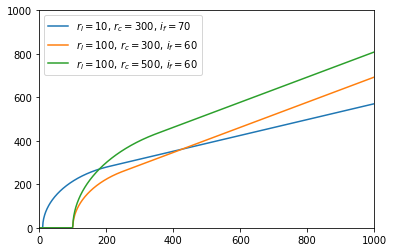

In [5]:
fig1=pl.figure()

ax=pl.subplot(111)
ax.set_xlim(0,1000)
ax.set_ylim(0,1000)


radii=np.linspace(0,1000,1000)
stream_hs_1=streamline(radii,launch_r=10.,r_curv=300.,i_final=70.)
stream_hs_2=streamline(radii,launch_r=100.,r_curv=300.,i_final=60.)
stream_hs_3=streamline(radii,launch_r=100.,r_curv=500.,i_final=60.)

ax.plot(radii,stream_hs_1,label=r'$r_l=10$, $r_c=300$, $i_f=70$')
ax.plot(radii,stream_hs_2,label=r'$r_l=100$, $r_c=300$, $i_f=60$')
ax.plot(radii,stream_hs_3,label=r'$r_l=100$, $r_c=500$, $i_f=60$')

pl.legend()

pl.show()



### Load inclination/velocity data for AGN sample:

In [6]:
sources=load_sources('data.tsv')


Analysing 1H 0707+495
Reflection loaded
43.0+/-2.0 Kara+15
3 UFOs loaded
Merging UFOs...
Consolodated to 2 UFOs
0.11+0.01-0.02 Dauser+12
0.18+/-0.009 Hagino+16; Dauser+12

Analysing IRAS 13349+2438
Reflection loaded
48.0+2.0-1.0 Parker+18
1 UFOs loaded
0.13+/-0.01 Parker+18

Analysing Ark 120
Reflection loaded
45.0+5.0-2.0 Garcia+14
1 UFOs loaded
0.29+/-0.02 Tombesi+11

Analysing 3C 390.3
Reflection loaded
35.0+/-0.0 Walton+13, Giovannini+01
1 UFOs loaded
0.145+/-0.007 Gofford+13

Analysing PDS 456
Reflection loaded
65.0+/-2.0 Chiang+17
14 UFOs loaded
Merging UFOs...
Consolodated to 2 UFOs
0.278+/-0.003 Reeves+18; Matzeu+17
0.46+/-0.02 Reeves+18

Analysing Mrk 79
Reflection loaded
24.0+/-1.0 Gallo+11
1 UFOs loaded
0.092+/-0.004 Tombesi+11

Analysing IC 4329A
Reflection loaded
35.0+/-5.0 Mantovani+14
1 UFOs loaded
0.098+/-0.004 Tombesi+11

Analysing Swift J2127
Reflection loaded
49.0+/-2.0 Marinucci+14b
1 UFOs loaded
0.231+/-0.006 Gofford+13

Analysing NGC 4051
Reflection loaded
37.0+/

### Get inclination/velocity points for the sample:

In [7]:
vs, v_errs, points, errs, llim_vs, llim_v_errs, llims, ulim_vs, ulim_v_errs, ulims = get_points(sources)


Getting points and limits
1H 0707+495 2 UFOs
IRAS 13349+2438 1 UFOs
Ark 120 1 UFOs
3C 390.3 1 UFOs
PDS 456 2 UFOs
Mrk 79 1 UFOs
IC 4329A 1 UFOs
Swift J2127 1 UFOs
NGC 4051 2 UFOs
Mrk 841 1 UFOs
Mrk 766 2 UFOs
1H 0419-577 1 UFOs
3C 111 1 UFOs
NGC 5506 1 UFOs
PG 1211+143 3 UFOs
Mrk 509 3 UFOs
IRAS 13224-3809 1 UFOs
MR 2251-178 1 UFOs
MCG-5-23-16 1 UFOs
NGC 4151 2 UFOs


### Plot points:

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in sqrt


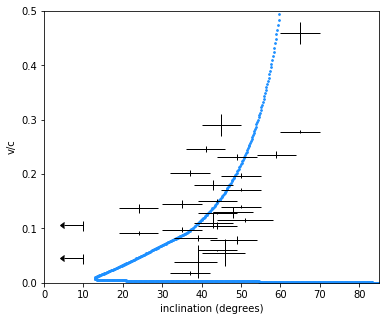

In [10]:

##############################################
#### Settings for the model to be overplotted:
v_1000   = 0.4
i_wind   = 70.
launch_r = 10.
r_curve  = 400.
r_exp    = 1
##############################################

fig2=pl.figure(figsize=(6,5))

ax=pl.subplot(111)
ax.set_xlim(0,85)
ax.set_ylim(0,0.5)
ax.set_ylabel('v/c')
ax.set_xlabel('inclination (degrees)')


#  Plot the points
pl.errorbar(points,vs,v_errs.T,errs.T,ls='none',lw=1,color='k')

# Plot upper limits:
if len(ulims)>0:
    pl.errorbar(ulims,ulim_vs,ulim_v_errs,0,ls='none',lw=1,color='k')
    pl.errorbar(ulims, ulim_vs,0, 5, xuplims=True,ls='none',lw=1,color='k')
    

for i in np.linspace(0,90,500):
    wind_vs=find_velocities(v=v_1000,i_view=i,i_final=i_wind,launch_r=launch_r,r_curv=r_curve,r_exponent=r_exp)
    if len(vs)>0:
        ax.scatter([i]*len(wind_vs),wind_vs,color='dodgerblue',s=3)
        
# pl.savefig('wind_velocity.pdf',bbox_inches='tight')